In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import os


In [ ]:
China_provinces = gpd.read_file('../data/China-maps/province.shp')
China_boundary = gpd.read_file('../data/China-maps/boundary.shp')
China_counties = gpd.read_file('../data/China-maps/county.shp')
China_provinces2 = gpd.read_file('../data/China-maps-simplified/province.shp')
China_counties2 = gpd.read_file('../data/China-maps-simplified/county.shp')
China_provinces['geometry'] = China_provinces2['geometry']
China_counties['geometry'] = China_counties2['geometry']
China_counties = China_counties.drop([176, 638, 639, 2403])

China_provinces = China_provinces.to_crs(2381)
China_boundary = China_boundary.to_crs(2381)
China_counties = China_counties.to_crs(2381)

China_county_production_POP = pd.read_csv('../outputs/China_county_production_POP.csv',)
China_county_production_GDP = pd.read_csv('../outputs/China_county_production_GDP.csv',)
China_county_production_combined = pd.read_csv('../outputs/China_county_production_combined.csv',)

In [50]:
China_counties = China_counties.reset_index(drop=True)

In [51]:
China_counties

,省,省代码,省类型,市,市代码,市类型,县,县代码,县类型,geometry,...,production_2045_combined,production_2050_POP,production_2050_GDP,production_2050_combined,diff_production_2030_GDP,diff_production_2030_combined,diff_production_2040_GDP,diff_production_2040_combined,diff_production_2050_GDP,diff_production_2050_combined
0,安徽省,340000.0,省,安庆市,340800.0,地级市,大观区,340803.0,市辖区,"POLYGON ((1370539.17 3414092.557, 1368646.591 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,安徽省,340000.0,省,安庆市,340800.0,地级市,怀宁县,340822.0,县,"POLYGON ((1362532.599 3436893.23, 1359639.116 ...",...,1485.0,NaN,NaN,NaN,-1233.0,-616.0,-1086.0,-428.0,NaN,NaN
2,安徽省,340000.0,省,安庆市,340800.0,地级市,潜山市,340882.0,县级市,"POLYGON ((1332432.948 3468783.706, 1334818.204...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,安徽省,340000.0,省,安庆市,340800.0,地级市,宿松县,340826.0,县,"POLYGON ((1316899.354 3364518.61, 1320841.721 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,安徽省,340000.0,省,安庆市,340800.0,地级市,太湖县,340825.0,县,"POLYGON ((1252372.662 3430730.578, 1253708.491...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,浙江省,330000.0,省,杭州市,330100.0,地级市,桐庐县,330122.0,县,"POLYGON ((1653721.435 3354122.431, 1655191.228...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2869,浙江省,330000.0,省,杭州市,330100.0,地级市,西湖区,330106.0,市辖区,"POLYGON ((1665968.558 3419745.34, 1668455.721 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2870,浙江省,330000.0,省,杭州市,330100.0,地级市,萧山区,330109.0,市辖区,"POLYGON ((1721776.828 3413108.299, 1717741.754...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2871,浙江省,330000.0,省,杭州市,330100.0,地级市,余杭区,330110.0,市辖区,"POLYGON ((1632922.214 3440615.715, 1632759.223...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
China_county_production_POP

,省,市,县,县代码,production_2020_POP,production_2025_POP,production_2030_POP,production_2035_POP,production_2040_POP,production_2045_POP,production_2050_POP
0,安徽省,安庆市,大观区,340803.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,安徽省,安庆市,怀宁县,340822.0,2970.0,2048.9,1558.0,1266.0,1086.0,1057.0,NaN
2,安徽省,安庆市,潜山市,340882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,安徽省,安庆市,宿松县,340826.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,安徽省,安庆市,太湖县,340825.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2868,浙江省,杭州市,桐庐县,330122.0,4950.0,4950.0,4950.0,4950.0,4665.0,NaN,NaN
2869,浙江省,杭州市,西湖区,330106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2870,浙江省,杭州市,萧山区,330109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2871,浙江省,杭州市,余杭区,330110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
China_counties

,省,省代码,省类型,市,市代码,市类型,县,县代码,县类型,geometry
0,安徽省,340000.0,省,安庆市,340800.0,地级市,大观区,340803.0,市辖区,"POLYGON ((1370539.17 3414092.557, 1368646.591 ..."
1,安徽省,340000.0,省,安庆市,340800.0,地级市,怀宁县,340822.0,县,"POLYGON ((1362532.599 3436893.23, 1359639.116 ..."
2,安徽省,340000.0,省,安庆市,340800.0,地级市,潜山市,340882.0,县级市,"POLYGON ((1332432.948 3468783.706, 1334818.204..."
3,安徽省,340000.0,省,安庆市,340800.0,地级市,宿松县,340826.0,县,"POLYGON ((1316899.354 3364518.61, 1320841.721 ..."
4,安徽省,340000.0,省,安庆市,340800.0,地级市,太湖县,340825.0,县,"POLYGON ((1252372.662 3430730.578, 1253708.491..."
...,...,...,...,...,...,...,...,...,...,...
2872,浙江省,330000.0,省,杭州市,330100.0,地级市,桐庐县,330122.0,县,"POLYGON ((1653721.435 3354122.431, 1655191.228..."
2873,浙江省,330000.0,省,杭州市,330100.0,地级市,西湖区,330106.0,市辖区,"POLYGON ((1665968.558 3419745.34, 1668455.721 ..."
2874,浙江省,330000.0,省,杭州市,330100.0,地级市,萧山区,330109.0,市辖区,"POLYGON ((1721776.828 3413108.299, 1717741.754..."
2875,浙江省,330000.0,省,杭州市,330100.0,地级市,余杭区,330110.0,市辖区,"POLYGON ((1632922.214 3440615.715, 1632759.223..."


In [39]:
China_counties['production_2030_POP']

0          NaN
1       1558.0
2          NaN
3          NaN
4          NaN
         ...  
2872       NaN
2873       NaN
2874       NaN
2875       NaN
2876       NaN
Name: production_2030_POP, Length: 2873, dtype: float64

In [45]:
China_counties

,省,省代码,省类型,市,市代码,市类型,县,县代码,县类型,geometry,...,production_2045_combined,production_2050_POP,production_2050_GDP,production_2050_combined,diff_production_2030_GDP,diff_production_2030_combined,diff_production_2040_GDP,diff_production_2040_combined,diff_production_2050_GDP,diff_production_2050_combined
0,安徽省,340000.0,省,安庆市,340800.0,地级市,大观区,340803.0,市辖区,"POLYGON ((1370539.17 3414092.557, 1368646.591 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,安徽省,340000.0,省,安庆市,340800.0,地级市,怀宁县,340822.0,县,"POLYGON ((1362532.599 3436893.23, 1359639.116 ...",...,1485.0,NaN,NaN,NaN,-1233.0,-616.0,-1086.0,-428.0,NaN,NaN
2,安徽省,340000.0,省,安庆市,340800.0,地级市,潜山市,340882.0,县级市,"POLYGON ((1332432.948 3468783.706, 1334818.204...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,安徽省,340000.0,省,安庆市,340800.0,地级市,宿松县,340826.0,县,"POLYGON ((1316899.354 3364518.61, 1320841.721 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,安徽省,340000.0,省,安庆市,340800.0,地级市,太湖县,340825.0,县,"POLYGON ((1252372.662 3430730.578, 1253708.491...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,浙江省,330000.0,省,杭州市,330100.0,地级市,桐庐县,330122.0,县,"POLYGON ((1653721.435 3354122.431, 1655191.228...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2873,浙江省,330000.0,省,杭州市,330100.0,地级市,西湖区,330106.0,市辖区,"POLYGON ((1665968.558 3419745.34, 1668455.721 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2874,浙江省,330000.0,省,杭州市,330100.0,地级市,萧山区,330109.0,市辖区,"POLYGON ((1721776.828 3413108.299, 1717741.754...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2875,浙江省,330000.0,省,杭州市,330100.0,地级市,余杭区,330110.0,市辖区,"POLYGON ((1632922.214 3440615.715, 1632759.223...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
China_county_production_POP

,省,市,县,县代码,production_2020_POP,production_2025_POP,production_2030_POP,production_2035_POP,production_2040_POP,production_2045_POP,production_2050_POP
0,安徽省,安庆市,大观区,340803.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,安徽省,安庆市,怀宁县,340822.0,2970.0,2048.9,1558.0,1266.0,1086.0,1057.0,NaN
2,安徽省,安庆市,潜山市,340882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,安徽省,安庆市,宿松县,340826.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,安徽省,安庆市,太湖县,340825.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2868,浙江省,杭州市,桐庐县,330122.0,4950.0,4950.0,4950.0,4950.0,4665.0,NaN,NaN
2869,浙江省,杭州市,西湖区,330106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2870,浙江省,杭州市,萧山区,330109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2871,浙江省,杭州市,余杭区,330110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
for t in range(2020, 2055, 5):
    China_counties[f'production_{t}_POP'] = China_county_production_POP[f'production_{t}_POP']
    China_counties[f'production_{t}_GDP'] = China_county_production_GDP[f'production_{t}_GDP']
    China_counties[f'production_{t}_combined'] = China_county_production_combined[f'production_{t}_combined']


In [53]:
China_counties['diff_production_2030_GDP'] = (China_counties['production_2030_GDP'].fillna(0) - China_counties['production_2030_POP'].fillna(0)).where(China_counties['production_2030_GDP'].notnull() | China_counties['production_2030_POP'].notnull())
China_counties['diff_production_2030_combined'] = (China_counties['production_2030_combined'].fillna(0) - China_counties['production_2030_POP'].fillna(0)).where(China_counties['production_2030_combined'].notnull() | China_counties['production_2030_POP'].notnull())
# China_counties['diff_capacities_2030_GDP'] = (China_counties['capacities_2030_GDP'].fillna(0) - China_counties['capacities_2030_POP'].fillna(0)).where(China_counties['capacities_2030_GDP'].notnull() | China_counties['capacities_2030_POP'].notnull())
# China_counties['diff_capacities_2030_combined'] = (China_counties['capacities_2030_combined'].fillna(0) - China_counties['capacities_2030_POP'].fillna(0)).where(China_counties['capacities_2030_combined'].notnull() | China_counties['capacities_2030_POP'].notnull())

In [54]:
China_counties['diff_production_2040_GDP'] = (China_counties['production_2040_GDP'].fillna(0) - China_counties['production_2040_POP'].fillna(0)).where(China_counties['production_2040_GDP'].notnull() | China_counties['production_2040_POP'].notnull())
China_counties['diff_production_2040_combined'] = (China_counties['production_2040_combined'].fillna(0) - China_counties['production_2040_POP'].fillna(0)).where(China_counties['production_2040_combined'].notnull() | China_counties['production_2040_POP'].notnull())
# China_counties['diff_capacities_2040_GDP'] = (China_counties['capacities_2040_GDP'].fillna(0) - China_counties['capacities_2040_POP'].fillna(0)).where(China_counties['capacities_2040_GDP'].notnull() | China_counties['capacities_2040_POP'].notnull())
# China_counties['diff_capacities_2040_combined'] = (China_counties['capacities_2040_combined'].fillna(0) - China_counties['capacities_2040_POP'].fillna(0)).where(China_counties['capacities_2040_combined'].notnull() | China_counties['capacities_2040_POP'].notnull())

In [55]:
China_counties['diff_production_2050_GDP'] = (China_counties['production_2050_GDP'].fillna(0) - China_counties['production_2050_POP'].fillna(0)).where(China_counties['production_2050_GDP'].notnull() | China_counties['production_2050_POP'].notnull())
China_counties['diff_production_2050_combined'] = (China_counties['production_2050_combined'].fillna(0) - China_counties['production_2050_POP'].fillna(0)).where(China_counties['production_2050_combined'].notnull() | China_counties['production_2050_POP'].notnull())
# China_counties['diff_capacities_2050_GDP'] = (China_counties['capacities_2050_GDP'].fillna(0) - China_counties['capacities_2050_POP'].fillna(0)).where(China_counties['capacities_2050_GDP'].notnull() | China_counties['capacities_2050_POP'].notnull())
# China_counties['diff_capacities_2050_combined'] = (China_counties['capacities_2050_combined'].fillna(0) - China_counties['capacities_2050_POP'].fillna(0)).where(China_counties['capacities_2050_combined'].notnull() | China_counties['capacities_2050_POP'].notnull())

In [35]:
China_counties['production_2030_POP'] = China_counties['production_2030_POP'].replace(0, np.nan)
China_counties['production_2040_POP'] = China_counties['production_2040_POP'].replace(0, np.nan)
China_counties['production_2050_POP'] = China_counties['production_2050_POP'].replace(0, np.nan)

In [36]:
China_counties['diff_production_2030_GDP'] = China_counties['diff_production_2030_GDP'].replace(0, np.nan)
China_counties['diff_production_2040_GDP'] = China_counties['diff_production_2040_GDP'].replace(0, np.nan)
China_counties['diff_production_2050_GDP'] = China_counties['diff_production_2050_GDP'].replace(0, np.nan)

In [37]:
China_counties['diff_production_2030_combined'] = China_counties['diff_production_2030_combined'].replace(0, np.nan)
China_counties['diff_production_2040_combined'] = China_counties['diff_production_2040_combined'].replace(0, np.nan)
China_counties['diff_production_2050_combined'] = China_counties['diff_production_2050_combined'].replace(0, np.nan)

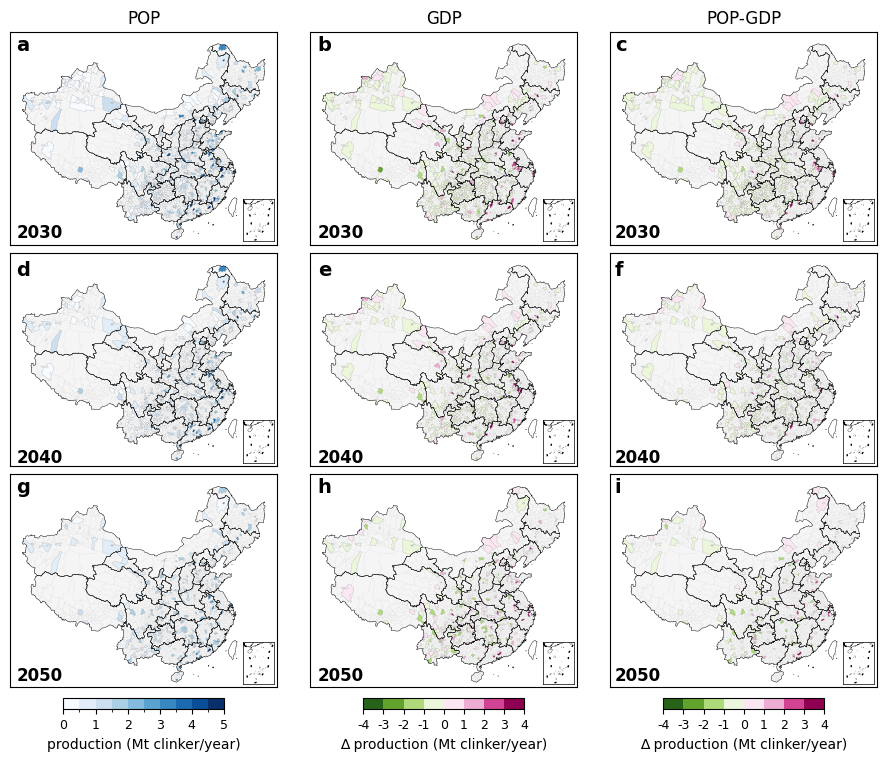

In [38]:
fig = plt.figure(figsize=(9, 7.5), constrained_layout=True)

years = [2030, 2030, 2030, 2040, 2040, 2040, 2050, 2050, 2050]
scenarios = ['POP', 'GDP', 'combined', 'POP', 'GDP', 'combined', 'POP', 'GDP', 'combined']

for i in range(1, 10):
    axx = plt.subplot(3, 3, i)
    China_provinces.plot(color='none', edgecolor='k', lw=0.3, zorder=7, ax=axx)
    China_counties.plot(color='whitesmoke', edgecolor='lightgrey', lw=0.1, zorder=1, ax=axx)
    axx.set(ylim=(1.9*10**6, 6.3*10**6), xticks=[], yticks=[])
    # axx.axis('off')

    cax2 = axx.inset_axes([0.87, 0.015, 0.12, 0.20])
    China_provinces.plot(color='none', lw=0.2, ax=cax2)
    China_boundary.plot(color='k', edgecolor='k', lw=1.0, ax=cax2)
    cax2.spines[:].set_linewidth(.5)
    cax2.set(xlim=(0.3*10**6, 2.0*10**6), ylim=(0.3*10**6, 2.65*10**6), xticks=[], yticks=[])

    if i == 1:
        axx.set(title='POP')
     
    if i == 2: 
        axx.set(title='GDP')
    
    if i == 3:
        axx.set(title='POP-GDP')

    if i in [1, 4, 7]:
        cmap_1 = 'Blues'
        bounds_1 = [i*5e2 for i in range(11)]  # Define the intervals
        norm_1 = mcolors.BoundaryNorm(bounds_1, plt.cm.Blues.N) 
        China_counties.plot(column=f'production_{years[i-1]}_{scenarios[i-1]}', norm=norm_1, cmap=cmap_1, zorder=6, lw=0.1, edgecolor='grey', ax=axx)

    else:
        # cmap_2 = 'BrBG_r'
        cmap_2 = 'PiYG_r'
        bounds_2 = [-4e3, -3e3, -2e3, -1e3, 0, 1e3, 2e3, 3e3, 4e3]
        norm_2 = mcolors.BoundaryNorm(bounds_2, plt.cm.Blues.N)
        China_counties.plot(column=f'diff_production_{years[i-1]}_{scenarios[i-1]}', norm=norm_2, cmap=cmap_2, zorder=6, lw=0.1, edgecolor='grey', ax=axx)

    if i == 7:
        cax1 = axx.inset_axes([0.2, -0.1, 0.6, 0.05]) 
        # Add a custom colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap_1, norm=norm_1)
        sm.set_array([])
        cbar = plt.colorbar(sm, cax=cax1, orientation='horizontal', label='production (Mt clinker/year)')
        cbar.ax.set_xticklabels([0, '', 1, '', 2, '', 3, '', 4, '', 5])
        cbar.ax.tick_params(labelsize=9, rotation=0)

    elif i in [8, 9]:
        cax1 = axx.inset_axes([0.2, -0.1, 0.6, 0.05]) 
        # Add a custom colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap_2, norm=norm_2)
        sm.set_array([])
        cbar = plt.colorbar(sm, cax=cax1, orientation='horizontal', label='∆ production (Mt clinker/year)')
        cbar.ax.set_xticklabels([-4, -3, -2, -1, 0, 1, 2, 3, 4])
        cbar.ax.tick_params(labelsize=9, rotation=0)

fig.text(0.025, 0.94, 'a', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.94, 'b', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.94, 'c', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.64, 'd', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.64, 'e', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.64, 'f', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.35, 'g', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.35, 'h', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.35, 'i', fontsize=14, fontdict={'weight': 'semibold'})


fig.text(0.025, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})

plt.show()

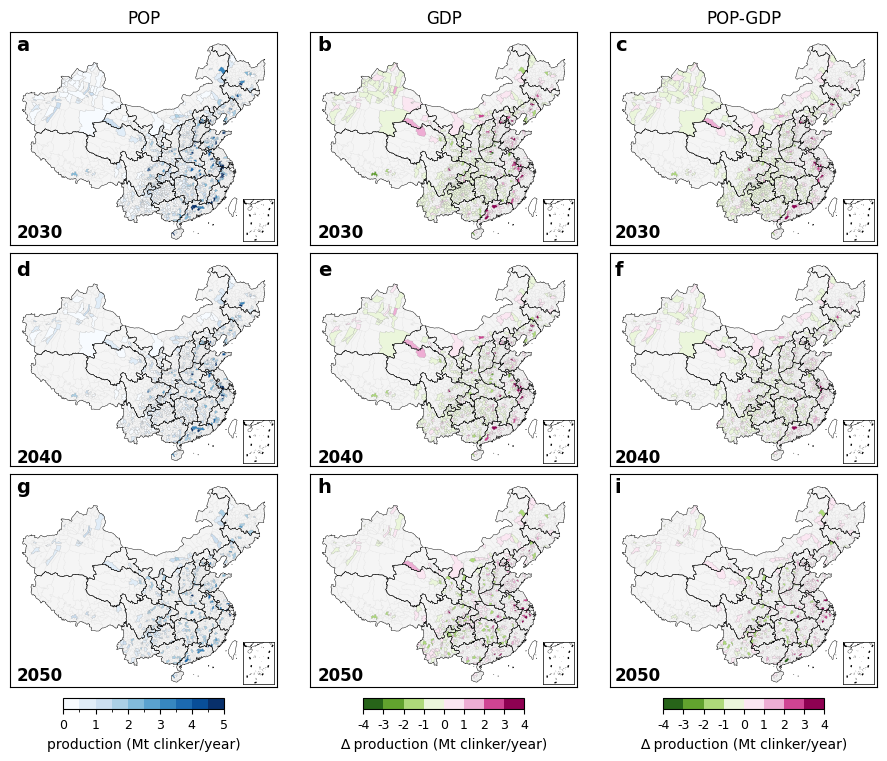

In [56]:
fig = plt.figure(figsize=(9, 7.5), constrained_layout=True)

years = [2030, 2030, 2030, 2040, 2040, 2040, 2050, 2050, 2050]
scenarios = ['POP', 'GDP', 'combined', 'POP', 'GDP', 'combined', 'POP', 'GDP', 'combined']

for i in range(1, 10):
    axx = plt.subplot(3, 3, i)
    China_provinces.plot(color='none', edgecolor='k', lw=0.3, zorder=7, ax=axx)
    China_counties.plot(color='whitesmoke', edgecolor='lightgrey', lw=0.1, zorder=1, ax=axx)
    axx.set(ylim=(1.9*10**6, 6.3*10**6), xticks=[], yticks=[])
    # axx.axis('off')

    cax2 = axx.inset_axes([0.87, 0.015, 0.12, 0.20])
    China_provinces.plot(color='none', lw=0.2, ax=cax2)
    China_boundary.plot(color='k', edgecolor='k', lw=1.0, ax=cax2)
    cax2.spines[:].set_linewidth(.5)
    cax2.set(xlim=(0.3*10**6, 2.0*10**6), ylim=(0.3*10**6, 2.65*10**6), xticks=[], yticks=[])

    if i == 1:
        axx.set(title='POP')
     
    if i == 2: 
        axx.set(title='GDP')
    
    if i == 3:
        axx.set(title='POP-GDP')

    if i in [1, 4, 7]:
        cmap_1 = 'Blues'
        bounds_1 = [i*5e2 for i in range(11)]  # Define the intervals
        norm_1 = mcolors.BoundaryNorm(bounds_1, plt.cm.Blues.N) 
        China_counties.plot(column=f'production_{years[i-1]}_{scenarios[i-1]}', norm=norm_1, cmap=cmap_1, zorder=6, lw=0.1, edgecolor='grey', ax=axx)

    else:
        # cmap_2 = 'BrBG_r'
        cmap_2 = 'PiYG_r'
        bounds_2 = [-4e3, -3e3, -2e3, -1e3, 0, 1e3, 2e3, 3e3, 4e3]
        norm_2 = mcolors.BoundaryNorm(bounds_2, plt.cm.Blues.N)
        China_counties.plot(column=f'diff_production_{years[i-1]}_{scenarios[i-1]}', norm=norm_2, cmap=cmap_2, zorder=6, lw=0.1, edgecolor='grey', ax=axx)

    if i == 7:
        cax1 = axx.inset_axes([0.2, -0.1, 0.6, 0.05]) 
        # Add a custom colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap_1, norm=norm_1)
        sm.set_array([])
        cbar = plt.colorbar(sm, cax=cax1, orientation='horizontal', label='production (Mt clinker/year)')
        cbar.ax.set_xticklabels([0, '', 1, '', 2, '', 3, '', 4, '', 5])
        cbar.ax.tick_params(labelsize=9, rotation=0)

    elif i in [8, 9]:
        cax1 = axx.inset_axes([0.2, -0.1, 0.6, 0.05]) 
        # Add a custom colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap_2, norm=norm_2)
        sm.set_array([])
        cbar = plt.colorbar(sm, cax=cax1, orientation='horizontal', label='∆ production (Mt clinker/year)')
        cbar.ax.set_xticklabels([-4, -3, -2, -1, 0, 1, 2, 3, 4])
        cbar.ax.tick_params(labelsize=9, rotation=0)

fig.text(0.025, 0.94, 'a', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.94, 'b', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.94, 'c', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.64, 'd', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.64, 'e', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.64, 'f', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.35, 'g', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.35, 'h', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.35, 'i', fontsize=14, fontdict={'weight': 'semibold'})


fig.text(0.025, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})

plt.show()

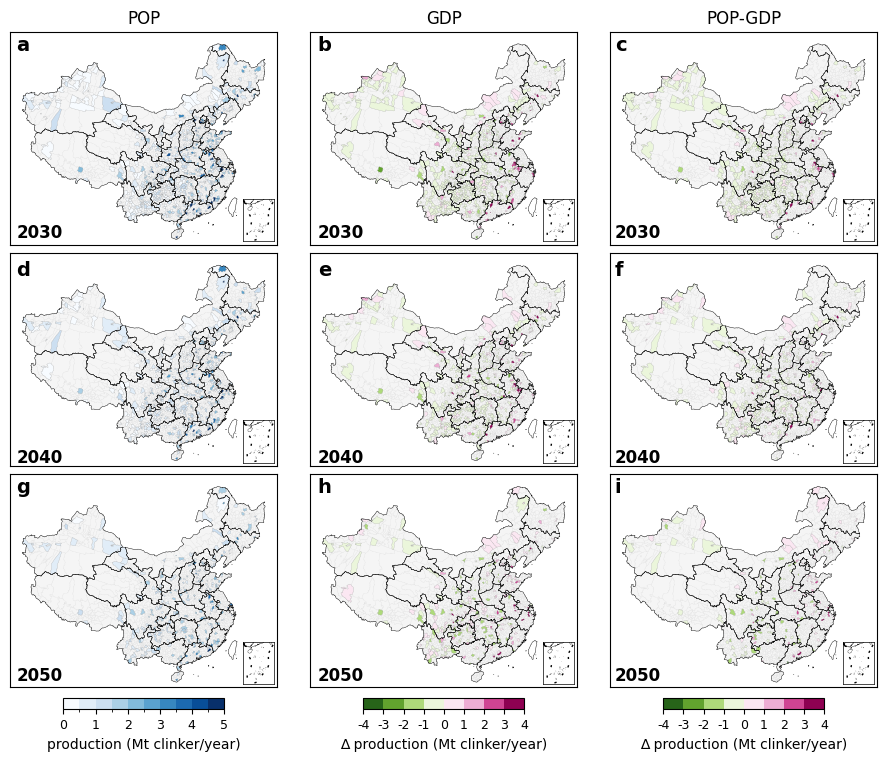

In [21]:
fig = plt.figure(figsize=(9, 7.5), constrained_layout=True)

years = [2030, 2030, 2030, 2040, 2040, 2040, 2050, 2050, 2050]
scenarios = ['POP', 'GDP', 'combined', 'POP', 'GDP', 'combined', 'POP', 'GDP', 'combined']

for i in range(1, 10):
    axx = plt.subplot(3, 3, i)
    China_provinces.plot(color='none', edgecolor='k', lw=0.3, zorder=7, ax=axx)
    China_counties.plot(color='whitesmoke', edgecolor='lightgrey', lw=0.1, zorder=1, ax=axx)
    axx.set(ylim=(1.9*10**6, 6.3*10**6), xticks=[], yticks=[])
    # axx.axis('off')

    cax2 = axx.inset_axes([0.87, 0.015, 0.12, 0.20])
    China_provinces.plot(color='none', lw=0.2, ax=cax2)
    China_boundary.plot(color='k', edgecolor='k', lw=1.0, ax=cax2)
    cax2.spines[:].set_linewidth(.5)
    cax2.set(xlim=(0.3*10**6, 2.0*10**6), ylim=(0.3*10**6, 2.65*10**6), xticks=[], yticks=[])

    if i == 1:
        axx.set(title='POP')
     
    if i == 2: 
        axx.set(title='GDP')
    
    if i == 3:
        axx.set(title='POP-GDP')

    if i in [1, 4, 7]:
        cmap_1 = 'Blues'
        bounds_1 = [i*5e2 for i in range(11)]  # Define the intervals
        norm_1 = mcolors.BoundaryNorm(bounds_1, plt.cm.Blues.N) 
        China_counties.plot(column=f'production_{years[i-1]}_{scenarios[i-1]}', norm=norm_1, cmap=cmap_1, zorder=6, lw=0.1, edgecolor='grey', ax=axx)

    else:
        # cmap_2 = 'BrBG_r'
        cmap_2 = 'PiYG_r'
        bounds_2 = [-4e3, -3e3, -2e3, -1e3, 0, 1e3, 2e3, 3e3, 4e3]
        norm_2 = mcolors.BoundaryNorm(bounds_2, plt.cm.Blues.N)
        China_counties.plot(column=f'diff_production_{years[i-1]}_{scenarios[i-1]}', norm=norm_2, cmap=cmap_2, zorder=6, lw=0.1, edgecolor='grey', ax=axx)

    if i == 7:
        cax1 = axx.inset_axes([0.2, -0.1, 0.6, 0.05]) 
        # Add a custom colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap_1, norm=norm_1)
        sm.set_array([])
        cbar = plt.colorbar(sm, cax=cax1, orientation='horizontal', label='production (Mt clinker/year)')
        cbar.ax.set_xticklabels([0, '', 1, '', 2, '', 3, '', 4, '', 5])
        cbar.ax.tick_params(labelsize=9, rotation=0)

    elif i in [8, 9]:
        cax1 = axx.inset_axes([0.2, -0.1, 0.6, 0.05]) 
        # Add a custom colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap_2, norm=norm_2)
        sm.set_array([])
        cbar = plt.colorbar(sm, cax=cax1, orientation='horizontal', label='∆ production (Mt clinker/year)')
        cbar.ax.set_xticklabels([-4, -3, -2, -1, 0, 1, 2, 3, 4])
        cbar.ax.tick_params(labelsize=9, rotation=0)

fig.text(0.025, 0.94, 'a', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.94, 'b', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.94, 'c', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.64, 'd', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.64, 'e', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.64, 'f', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.35, 'g', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.35, 'h', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.35, 'i', fontsize=14, fontdict={'weight': 'semibold'})


fig.text(0.025, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})

plt.show()

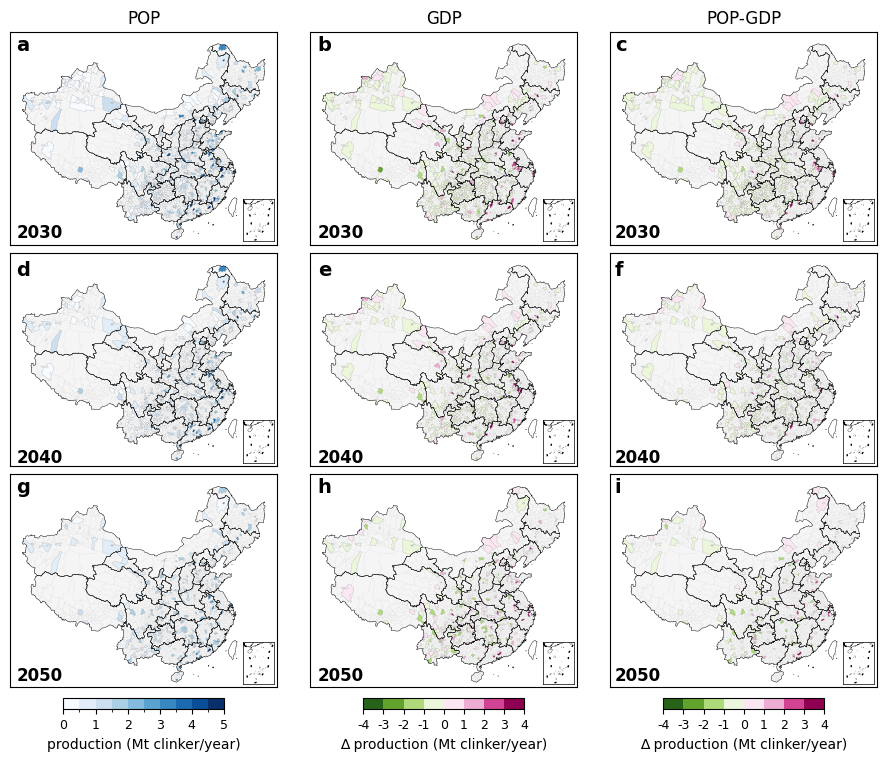

In [40]:
fig = plt.figure(figsize=(9, 7.5), constrained_layout=True)

years = [2030, 2030, 2030, 2040, 2040, 2040, 2050, 2050, 2050]
scenarios = ['POP', 'GDP', 'combined', 'POP', 'GDP', 'combined', 'POP', 'GDP', 'combined']

for i in range(1, 10):
    axx = plt.subplot(3, 3, i)
    China_provinces.plot(color='none', edgecolor='k', lw=0.3, zorder=7, ax=axx)
    China_counties.plot(color='whitesmoke', edgecolor='lightgrey', lw=0.1, zorder=1, ax=axx)
    axx.set(ylim=(1.9*10**6, 6.3*10**6), xticks=[], yticks=[])
    # axx.axis('off')

    cax2 = axx.inset_axes([0.87, 0.015, 0.12, 0.20])
    China_provinces.plot(color='none', lw=0.2, ax=cax2)
    China_boundary.plot(color='k', edgecolor='k', lw=1.0, ax=cax2)
    cax2.spines[:].set_linewidth(.5)
    cax2.set(xlim=(0.3*10**6, 2.0*10**6), ylim=(0.3*10**6, 2.65*10**6), xticks=[], yticks=[])

    if i == 1:
        axx.set(title='POP')
     
    if i == 2: 
        axx.set(title='GDP')
    
    if i == 3:
        axx.set(title='POP-GDP')

    if i in [1, 4, 7]:
        cmap_1 = 'Blues'
        bounds_1 = [i*5e2 for i in range(11)]  # Define the intervals
        norm_1 = mcolors.BoundaryNorm(bounds_1, plt.cm.Blues.N) 
        China_counties.plot(column=f'production_{years[i-1]}_{scenarios[i-1]}', norm=norm_1, cmap=cmap_1, zorder=6, lw=0.1, edgecolor='grey', ax=axx)

    else:
        # cmap_2 = 'BrBG_r'
        cmap_2 = 'PiYG_r'
        bounds_2 = [-4e3, -3e3, -2e3, -1e3, 0, 1e3, 2e3, 3e3, 4e3]
        norm_2 = mcolors.BoundaryNorm(bounds_2, plt.cm.Blues.N)
        China_counties.plot(column=f'diff_production_{years[i-1]}_{scenarios[i-1]}', norm=norm_2, cmap=cmap_2, zorder=6, lw=0.1, edgecolor='grey', ax=axx)

    if i == 7:
        cax1 = axx.inset_axes([0.2, -0.1, 0.6, 0.05]) 
        # Add a custom colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap_1, norm=norm_1)
        sm.set_array([])
        cbar = plt.colorbar(sm, cax=cax1, orientation='horizontal', label='production (Mt clinker/year)')
        cbar.ax.set_xticklabels([0, '', 1, '', 2, '', 3, '', 4, '', 5])
        cbar.ax.tick_params(labelsize=9, rotation=0)

    elif i in [8, 9]:
        cax1 = axx.inset_axes([0.2, -0.1, 0.6, 0.05]) 
        # Add a custom colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap_2, norm=norm_2)
        sm.set_array([])
        cbar = plt.colorbar(sm, cax=cax1, orientation='horizontal', label='∆ production (Mt clinker/year)')
        cbar.ax.set_xticklabels([-4, -3, -2, -1, 0, 1, 2, 3, 4])
        cbar.ax.tick_params(labelsize=9, rotation=0)

fig.text(0.025, 0.94, 'a', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.94, 'b', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.94, 'c', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.64, 'd', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.64, 'e', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.64, 'f', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.35, 'g', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.35, 'h', fontsize=14, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.35, 'i', fontsize=14, fontdict={'weight': 'semibold'})


fig.text(0.025, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.69, '2030', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.39, '2040', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.025, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.36, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})
fig.text(0.69, 0.10, '2050', fontsize=12, fontdict={'weight': 'semibold'})

plt.show()
# fig.savefig(r'figures/Fig_5.jpg', dpi=600, bbox_inches='tight')

In [43]:
China_counties['production_2030_POP'].to_csv('123.csv')

In [44]:
China_counties.loc[175:185, ['县', 'production_2030_POP']]

,县,production_2030_POP
175,惠安县,NaN
177,晋江市,NaN
178,鲤城区,NaN
179,洛江区,NaN
180,南安市,NaN
181,泉港区,NaN
182,石狮市,1650.0
183,永春县,3300.0
184,大田县,NaN
185,建宁县,144.0
